In [1]:
#To do :
#    -> corect tipos 
#    -> ad info
#    -> ad coments

## Data Exploration

In this notebook, we use the "SUSY" Dataset provided by the UC Irvine Machine Learning Repository [1]. In order to find whether a desired particle occurs as a consequence of a collision, we analyze the decay products as they go through multiple layers of detectors where we try to measure the momentum and direction of the particles. 

In the dataset, we use parameters that are obtained by the Monte Carlo simulation. A signal is described by 18 parameters, the first 8 features are kinematic proprieties, and the rest are functions of the first 8.

__main features:__

$p_T$-> momentum is transverse from the beam detector.

$\theta$,$\phi$-> polar respectiv azimutal angle

$\eta=-ln(tan(\theta/2)$-> sometime use intead of $\theta$

The momentum carried out by the invisible particle can not be directly measured, but it is rather determined using the laws of conservation of momentum since the initial transversal momentum is 0 and it should stay the same where any transversal momentum $E_T$ must be due to the apparition of exotic particle. More information about the data can be found in [2]

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA

The original dataset [1] contains data from  $5000000$ simulations. Here we will use just a fraction from the entire data set. 

In [6]:
label=['signal','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

# features labels
feature=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


df=pd.read_csv('~/SageMaker/SUSY_cut.csv',nrows=10000) 
# When first upload data uncoment hte line bellow 
#df=pd.read_csv('~/SageMaker/SUSY.csv',names=label,nrows=10000)
#df.to_csv('Data/SUSY_cut.csv', index = False)

df.head(n=5)

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [7]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   signal                    10000 non-null  float64
 1   lepton 1 pT               10000 non-null  float64
 2   lepton 1 eta              10000 non-null  float64
 3   lepton 1 phi              10000 non-null  float64
 4   lepton 2 pT               10000 non-null  float64
 5   lepton 2 eta              10000 non-null  float64
 6   lepton 2 phi              10000 non-null  float64
 7   missing energy magnitude  10000 non-null  float64
 8   missing energy phi        10000 non-null  float64
 9   MET_rel                   10000 non-null  float64
 10  axial MET                 10000 non-null  float64
 11  M_R                       10000 non-null  float64
 12  M_TR_2                    10000 non-null  float64
 13  R                         10000 non-null  float64
 14  MT2    

In [8]:
df.describe()

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,0.458000,0.998473,-0.004496,-0.000648,0.993125,-0.010946,0.015393,1.008317,-0.000015,0.995831,0.005236,0.999703,0.999350,0.999739,0.998307,0.998105,1.003046,0.997132,2.268696e-01
std,0.498258,0.678865,1.002655,1.004128,0.641595,1.004209,0.999310,0.918953,1.001747,0.893580,1.044459,0.633916,0.585771,0.473709,0.846912,0.627091,0.623232,0.437639,1.992722e-01
min,0.000000,0.265829,-2.102170,-1.734093,0.428693,-2.058400,-1.733843,0.002086,-1.727112,0.000276,-7.638416,0.281638,0.015300,0.024300,0.000000,0.155334,0.007738,0.000697,3.520310e-07
25%,0.000000,0.562303,-0.760981,-0.871676,0.592593,-0.772137,-0.856581,0.482739,-0.864014,0.372441,-0.487227,0.591083,0.621670,0.649112,0.186255,0.597679,0.519666,0.686590,6.736385e-02
50%,0.000000,0.794279,-0.001058,0.001626,0.799632,-0.002408,0.022697,0.770998,-0.011874,0.785423,-0.083003,0.831152,0.875933,0.932084,0.903385,0.837265,0.917411,1.090262,1.704890e-01
75%,1.000000,1.207049,0.754134,0.876795,1.161719,0.759213,0.878354,1.197405,0.870776,1.370520,0.336507,1.206306,1.212240,1.282868,1.603113,1.199121,1.386425,1.369750,3.329400e-01
max,1.000000,8.843125,2.101403,1.734187,9.153182,2.059194,1.734349,13.680408,1.740314,11.626125,13.375183,13.969072,6.523737,5.335464,4.195099,14.024200,5.267689,1.591609,9.533260e-01


<IPython.core.display.Javascript object>


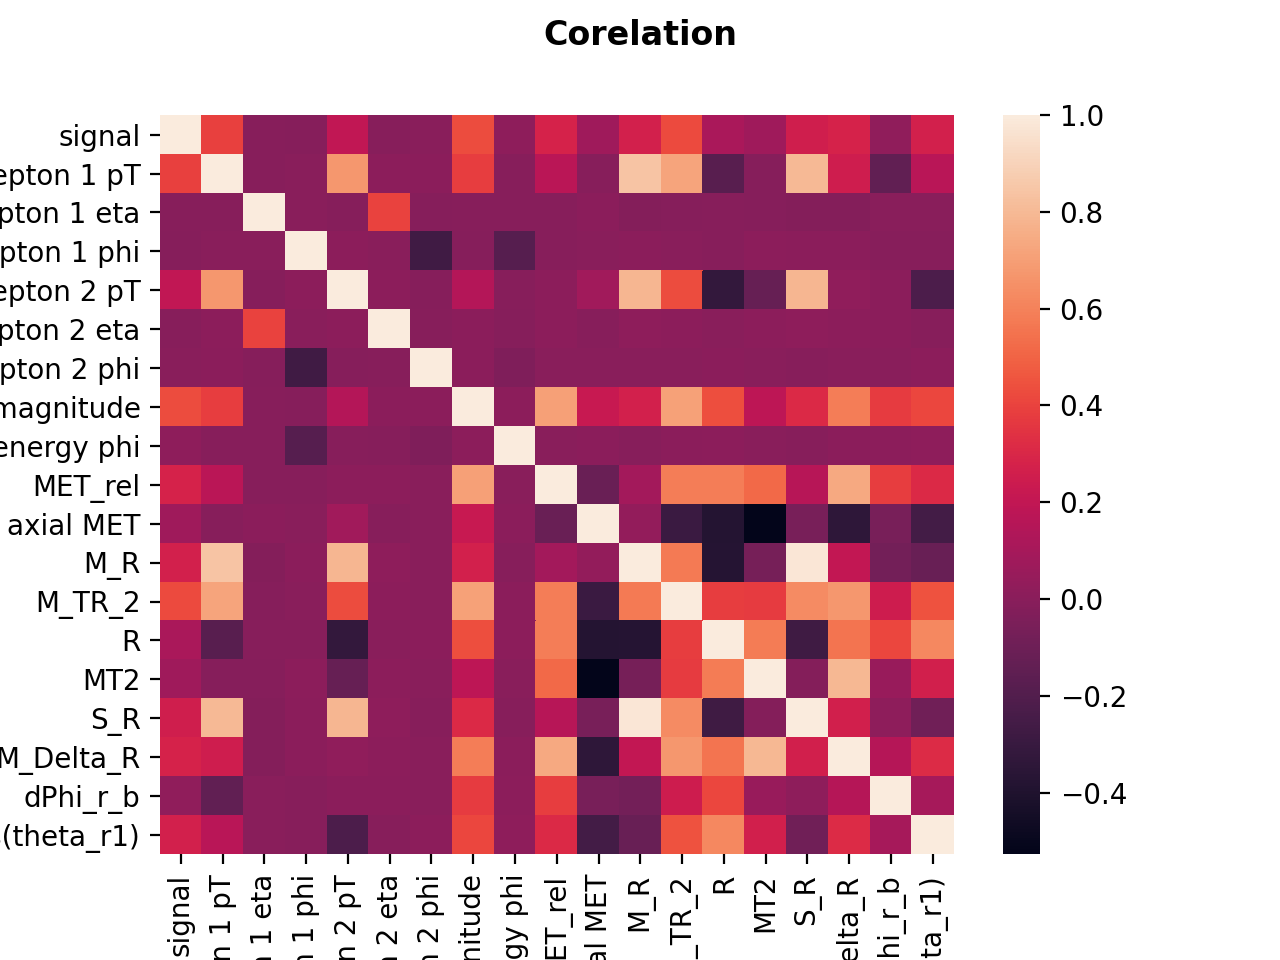

In [9]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)
plt.suptitle("Corelation",fontweight="bold")
plt.show()

In [10]:
corr_matrix['signal'].sort_values(ascending=False)

signal                      1.000000
missing energy magnitude    0.427744
M_TR_2                      0.424222
lepton 1 pT                 0.395465
M_Delta_R                   0.281247
MET_rel                     0.280748
cos(theta_r1)               0.268620
M_R                         0.266896
S_R                         0.256233
lepton 2 pT                 0.198736
R                           0.111094
MT2                         0.079901
axial MET                   0.078727
dPhi_r_b                    0.025986
missing energy phi          0.020575
lepton 2 phi                0.002461
lepton 2 eta               -0.003698
lepton 1 eta               -0.008555
lepton 1 phi               -0.009855
Name: signal, dtype: float64

Data that we use is similar with data used by Koji Terashi et al in [3]. $p_T^{lep1}$,$p_T^{lep2}$,$E_T^{miss}$(missing energy magnitude) when we use 3 variables.When we use 6 we add $M^T_R2$,$M^R_\Delta$ and $S_R$ unles we specify otherwise.

Here we have distribution of signal label for each of the futures:

<IPython.core.display.Javascript object>


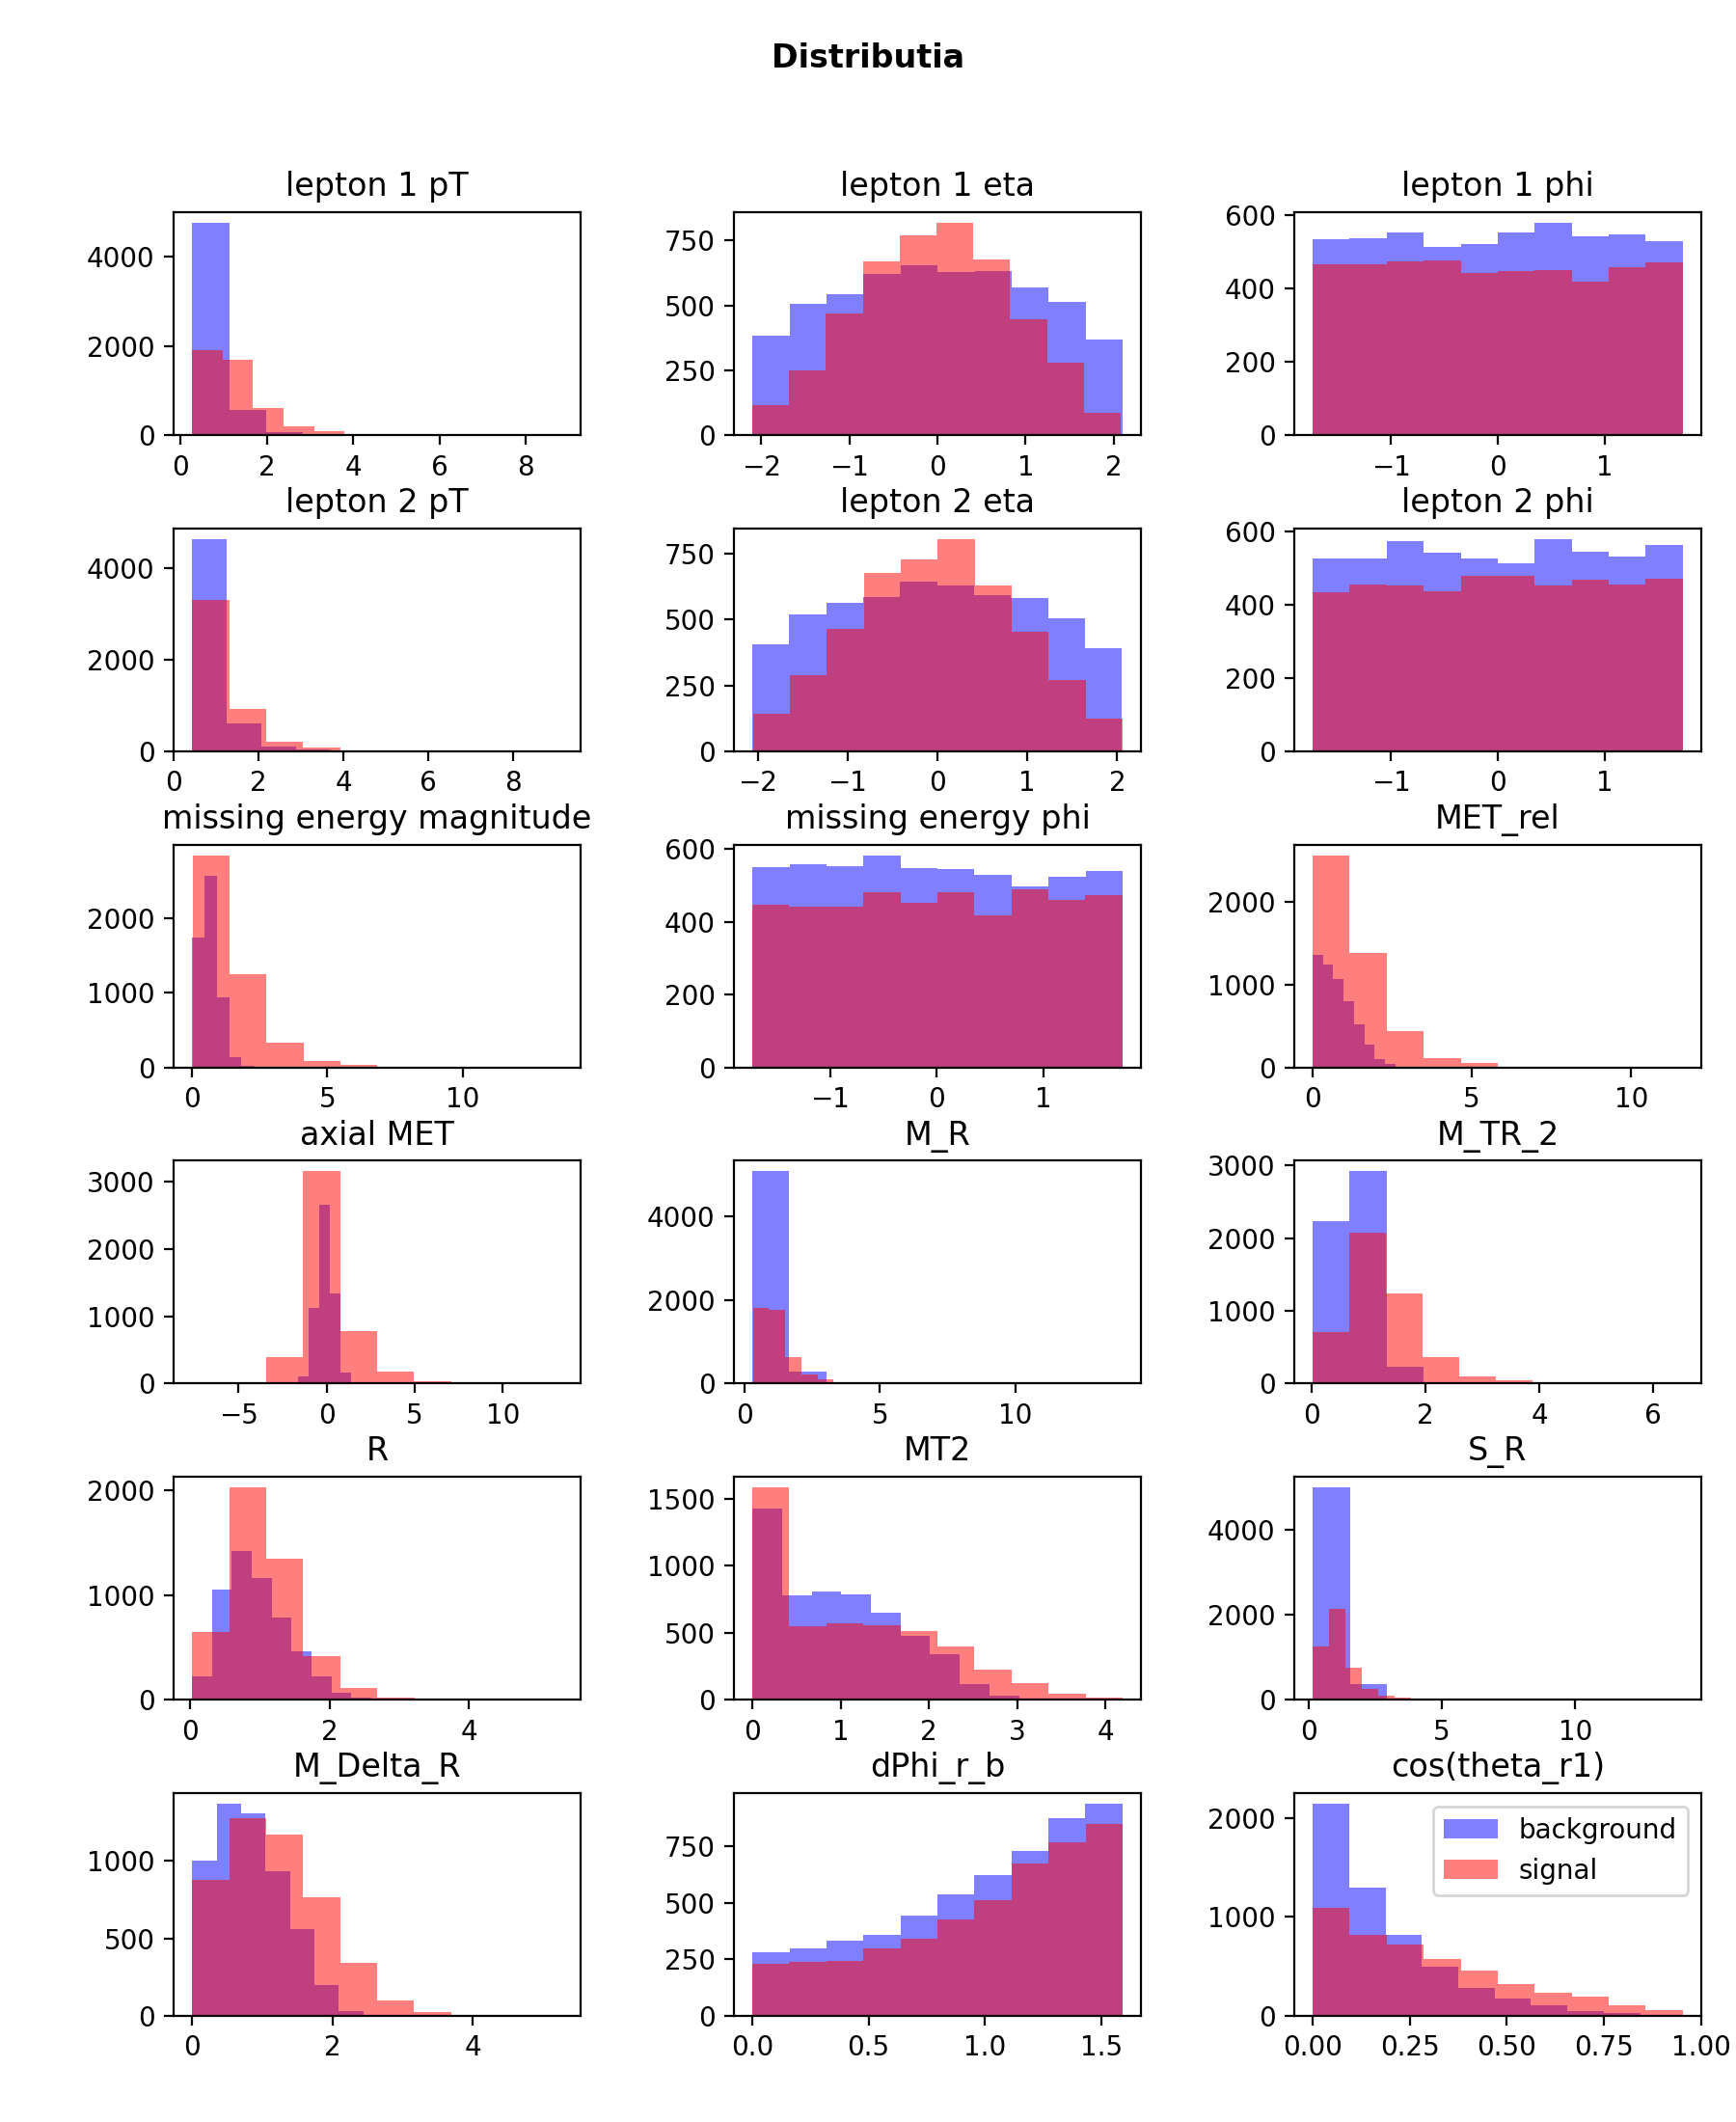

In [11]:
particle=df[df['signal']==1]
background=df[df['signal']==0]

# histograms 
# 18 histogram
nr_row=3000
i=0

fig, ax = plt.subplots(6,3,figsize=(9, 11))
fig.tight_layout(pad=1.7)
plt.subplots_adjust(bottom=0.05, right=0.98,left=0.1, top=0.9)
for i in range(18):
    ax[int(i/3),int(i%3)].hist(background[feature[i]], alpha=0.5,color='b', label='background')
    ax[int(i/3),int(i%3)].hist(particle[feature[i]],  alpha=0.5,color='r', label='signal')
    ax[int(i/3),int(i%3)].title.set_text(feature[i])
    
fig.suptitle("Distributia",fontweight="bold")
plt.legend(loc='upper right',)
plt.show()

#fig.savefig("",bbox_inches='tight',dpi=dpiVal)

Now let's see how our data looks like in the space of some of the features that we use.

<IPython.core.display.Javascript object>


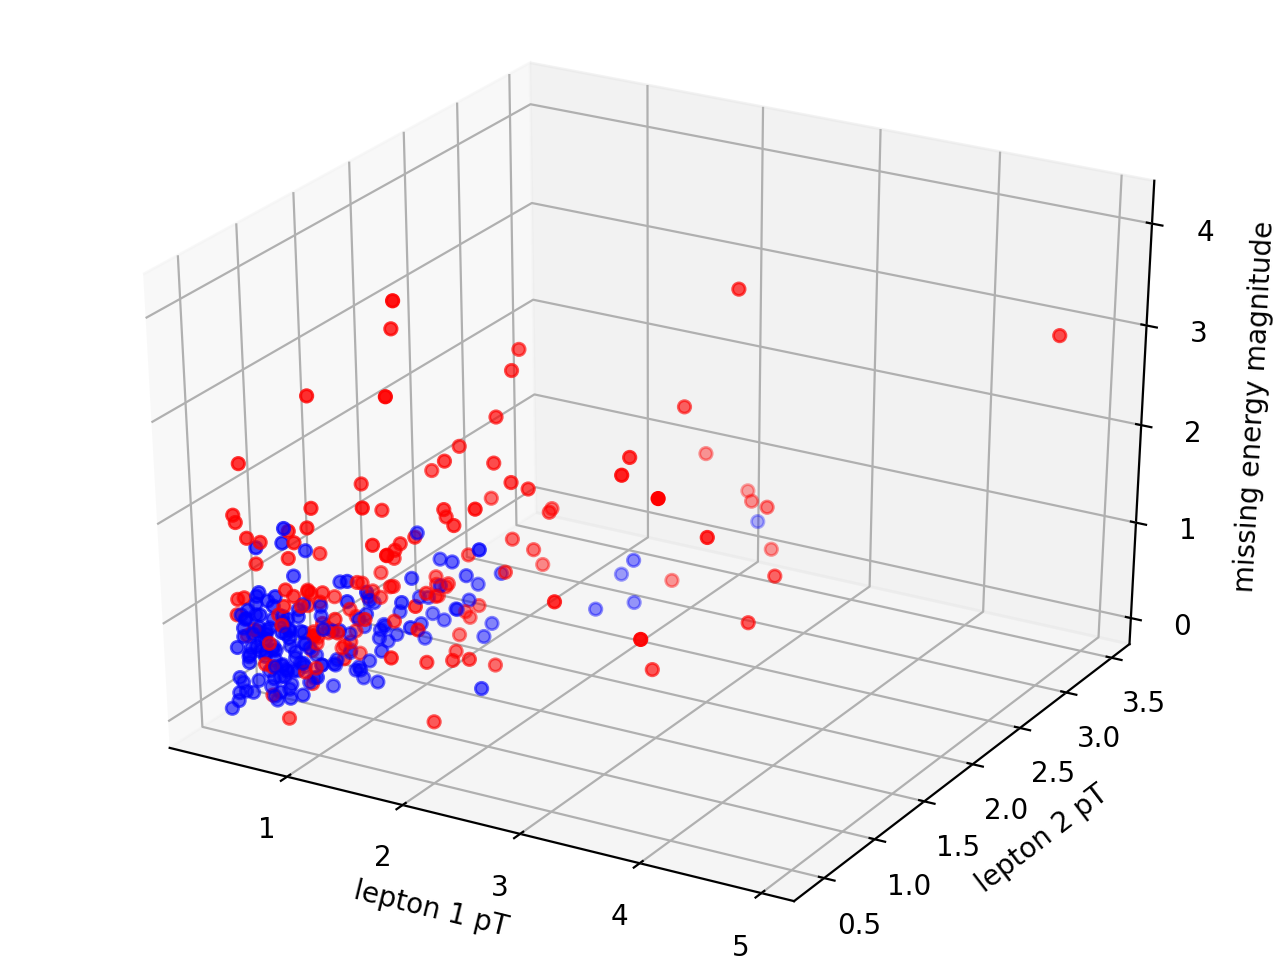

In [12]:

nr_row=300
feature_l1=df['lepton 1 pT'][:nr_row]
feature_l2=df['lepton 2 pT'][:nr_row]
feature_mem=df['missing energy magnitude'][:nr_row]

color=['r' if df['signal'][i]==1  else 'b' for i in range(nr_row)]



fig1=plt.figure()


ax1=Axes3D(fig1)
ax1.scatter(feature_l1,feature_l2,feature_mem,color=color)
ax1.set_xlabel('lepton 1 pT')
ax1.set_ylabel('lepton 2 pT')
ax1.set_zlabel('missing energy magnitude')


plt.show()

<IPython.core.display.Javascript object>


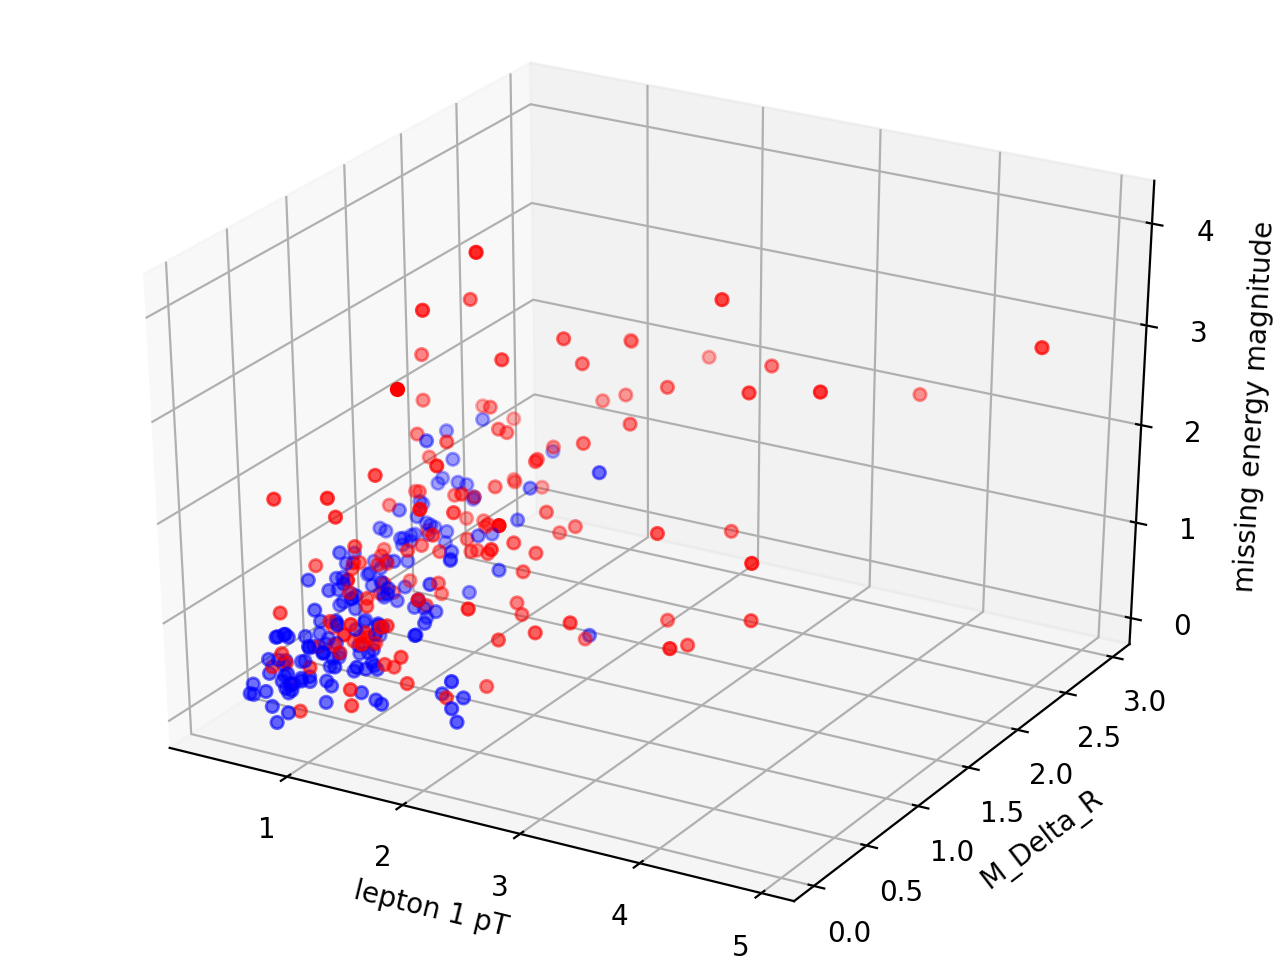

In [13]:
nr_row=300
feature_ax_meT=df['M_Delta_R'][:nr_row]

fig1=plt.figure()


ax1=Axes3D(fig1)
ax1.scatter(feature_l1,feature_ax_meT,feature_mem,color=color)
ax1.set_xlabel('lepton 1 pT')
ax1.set_ylabel('M_Delta_R')
ax1.set_zlabel('missing energy magnitude')


plt.show()

## PCA

In order to increase the performance of our algorithm, we will use the Principal Component Analysis (PCA) method.

In [14]:
features_label=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']
fetures=df[features_label]
scalar=StandardScaler()
scalar.fit(fetures)
scale_data=scalar.transform(fetures)

new_futures=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']
pca=PCA(n_components=6)
pca.fit(scale_data)
X_pca=pca.transform(scale_data)
X_pca=pd.DataFrame(X_pca, columns=new_futures)
print(X_pca.shape)
X_pca.head(5)

(10000, 6)


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,0.299294,1.808111,-0.587142,0.550162,1.525953,0.241052
1,-0.998985,1.115896,4.310456,0.403283,-1.018405,-1.869923
2,0.400149,-2.449340,-0.213074,1.223981,-0.013805,0.758044
3,1.338182,-2.710809,0.537289,0.004900,0.549371,1.371815
4,-0.864913,1.963748,1.514557,1.049575,-0.428885,-0.648939


<IPython.core.display.Javascript object>


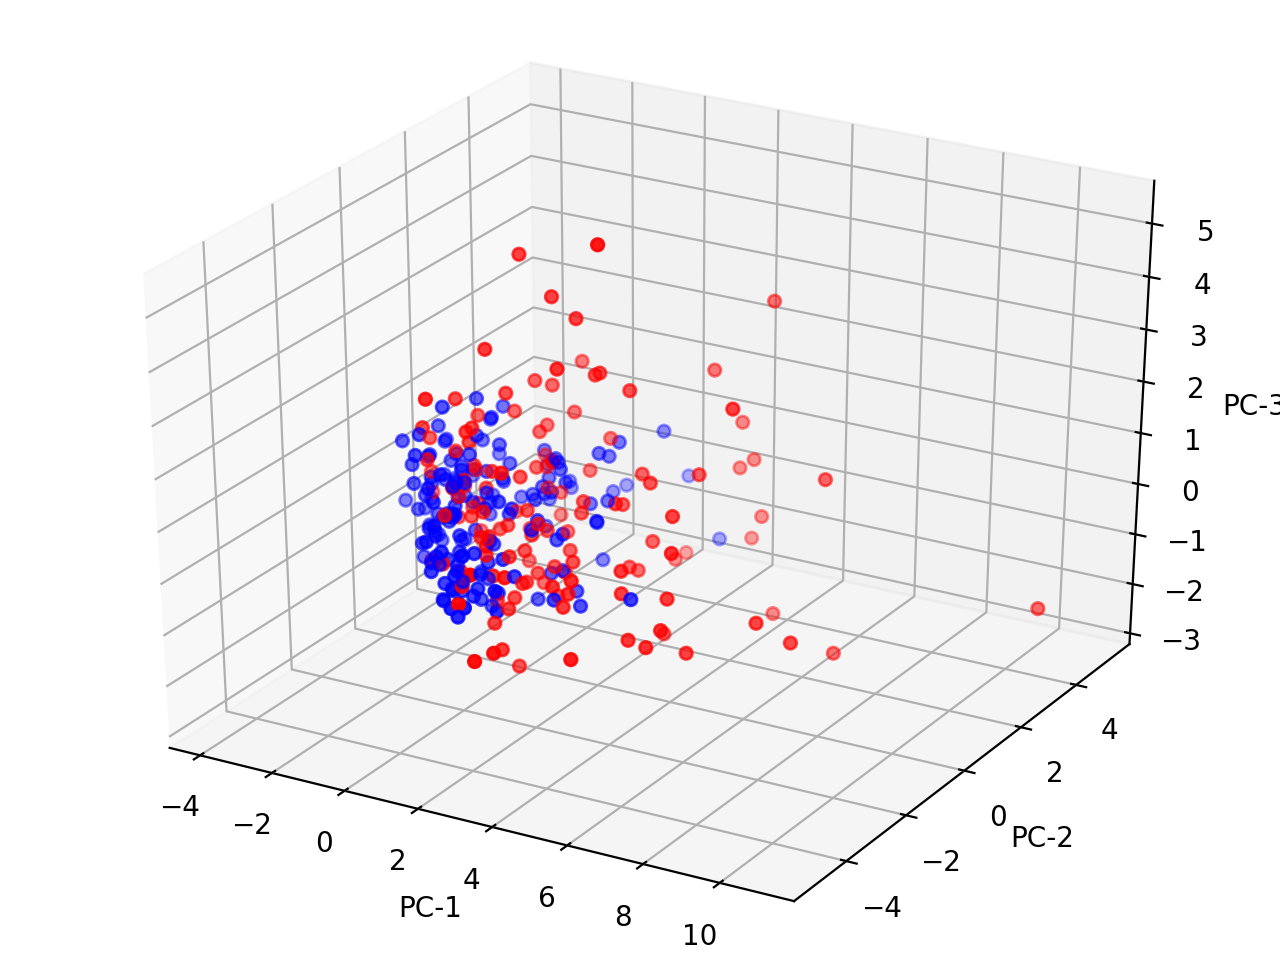

<IPython.core.display.Javascript object>


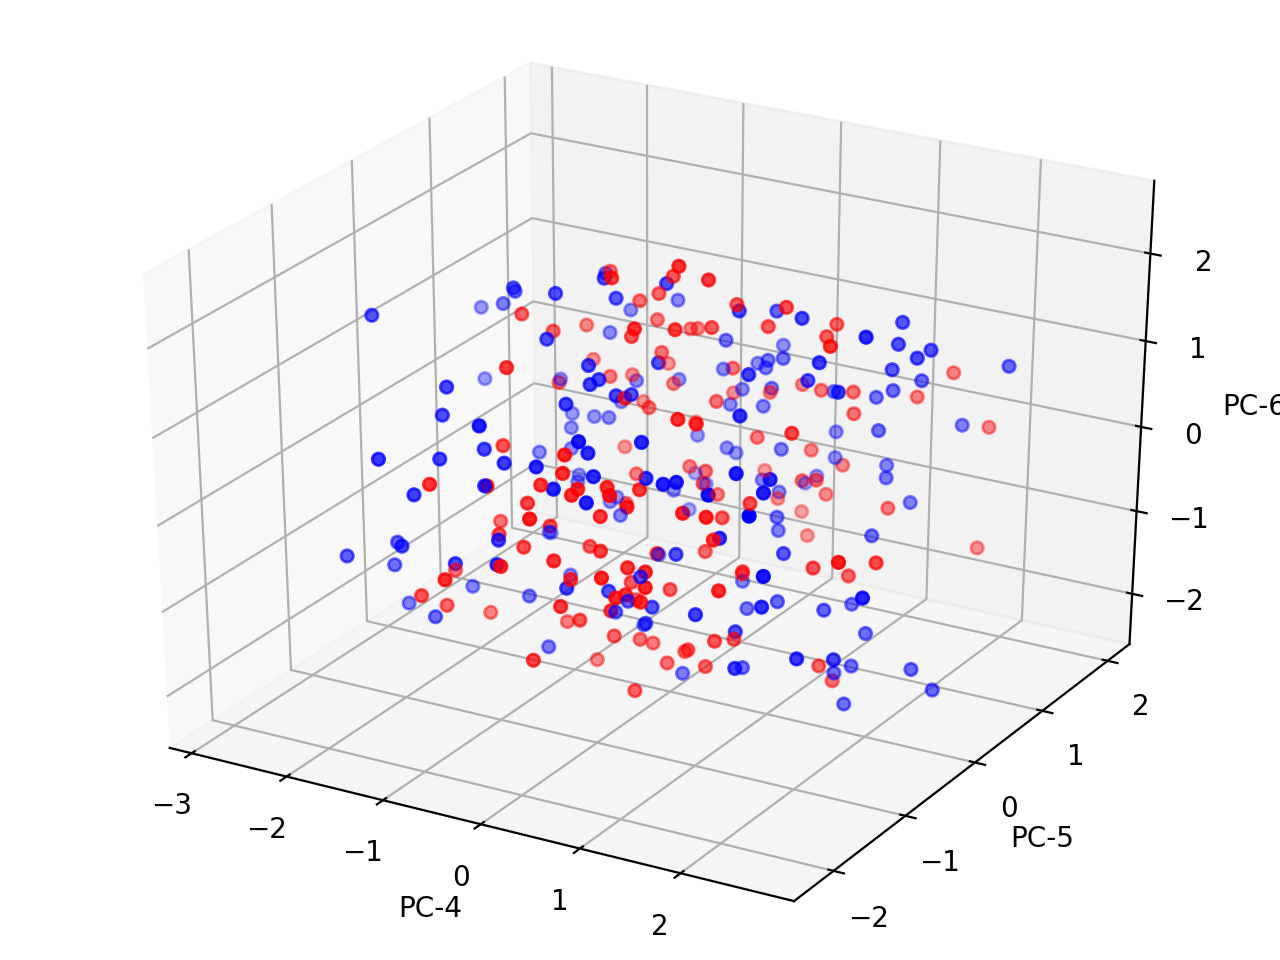

In [15]:
nr_row=300
color=['r' if df['signal'][i]==1  else 'b' for i in range(nr_row)]
future_1=X_pca['PC-1'][:nr_row]
future_2=X_pca['PC-2'][:nr_row]
future_3=X_pca['PC-3'][:nr_row]
future_4=X_pca['PC-4'][:nr_row]
future_5=X_pca['PC-5'][:nr_row]
future_6=X_pca['PC-6'][:nr_row]


fig1=plt.figure()
fig2=plt.figure()
plt.show()

ax1=Axes3D(fig1)
ax1.scatter(future_1,future_2,future_3,color=color)
ax1.set_xlabel('PC-1')
ax1.set_ylabel('PC-2')
ax1.set_zlabel('PC-3')

ax2=Axes3D(fig2)
ax2.scatter(future_4,future_5,future_6,color=color)
ax2.set_xlabel('PC-4')
ax2.set_ylabel('PC-5')
ax2.set_zlabel('PC-6')

plt.show()

## References 

[1]  [Dua, D., Graff, C.: UCI machine learning repository (2017).](http://archive.ics.uci.edu/ml)
      
[2]  [Baldi, P., Sadowski, P., Whiteson, D.: Searching for Ex- otic Particles in High-Energy Physics with Deep Learn- ing. Nature Commun. 5, 4308 (2014). DOI 10.1038/ ncomms5308.](https://arxiv.org/abs/1402.4735)
                        
[3]  [Koji Terashi · Michiru Kaneda · Tomoe Kishimoto · Masahiko Saito · Ryu Sawada · Junichi Tanaka Event Classification with Quantum Machine Learning in High-Energy Physics.](https://arxiv.org/abs/2002.09935)